## `Faces SVD`

In the provided code, we leverage the Singular Value Decomposition (SVD) to analyze a dataset of grayscale images of faces. SVD is a powerful linear algebra technique used for dimensionality reduction, noise reduction, and identifying underlying structures in data. The dataset, derived from the `Yale_64x64.mat` file, comprises a collection of 64x64 pixel grayscale images, each represented as a row in the data matrix `fea`.

Initially, we transpose the data matrix so that each row represents an image. This alignment facilitates the subsequent reshaping and visualization steps, rendering each image as a 2D array of pixel intensities.

We then visually inspect the raw data and the individual face images, rendering them in grayscale to appreciate the facial features captured in the dataset.

The core of the analysis lies in the application of SVD to the data matrix `fea`. The decomposition yields three matrices: `U`, `S`, and `Vt`, where `Vt` (the transpose of matrix V) contains the right singular vectors of `fea`. These singular vectors encapsulate the significant features across the dataset, effectively serving as the "eigenfaces" in the context of facial recognition. Each right singular vector represents a linear combination of the original face images, highlighting the underlying patterns and structures shared across different faces.

We reorganize and visualize the right singular vectors (eigenfaces) obtained from the decomposition, displaying them in a grid for intuitive inspection. This visualization aids in understanding the essence of dimensionality reduction and feature extraction performed by SVD, illuminating the significant facial features that emerge when analyzing the dataset in its entirety.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Define the path to the data file
data_path = '../../data/Yale_64x64.mat'

# Load the data from the MAT file
data = scipy.io.loadmat(data_path)

# Extract the 'fea' field from the data, which contains the image data
# Initially, data['fea'] has 4096 rows, each row containing 165 pixel values from 165 different images
fea = data['fea']

# Transpose the 'fea' matrix
# Post-transposition, each row in 'fea' now represents a distinct image,
# with each column corresponding to a different pixel value across the images.
fea = np.transpose(fea)




 In this segment, we initiate the process by loading the dataset and preparing it for further analysis. The data is stored in a MAT file, specifically Yale_64x64.mat, from which we extract the image data stored in the fea field.

The matrix **data['fea']** initially contains **4096 rows**, each corresponding to the pixel values of a different image. **Each row** is a 1D array comprising 165 values, representing a sequence of pixels from **165 distinct images**. However, to align with our analysis needs, we transpose this matrix. Post-transposition, **each row in fea now represents a distinct image**, with each column corresponding to a different pixel value across the images.

In [1]:
# Set the dimensions of each image
faceW = 64  # Width of each image
faceH = 64  # Height of each image

# Set the layout for the image grid
numPerLine = 8  # Number of images to display per line
ShowLine = 4   # Number of lines of images to display


In this segment, we specify the dimensions of each image and determine the layout for displaying a selection of images from the dataset. By setting `faceW` and `faceH`, we define the width and height of each image as 64 pixels, respectively. Through `numPerLine` and `ShowLine`, we control the layout of the image grid, deciding how many images to display per line and how many lines of images to display, respectively.

Although the dataset contains 165 images, for a clearer and focused visualization, we opt to display a smaller subset of 32 images in a grid layout of 4 lines with 8 images per line. Altering `numPerLine` and `ShowLine` can accommodate different grid configurations to include more or fewer images in the visualization.

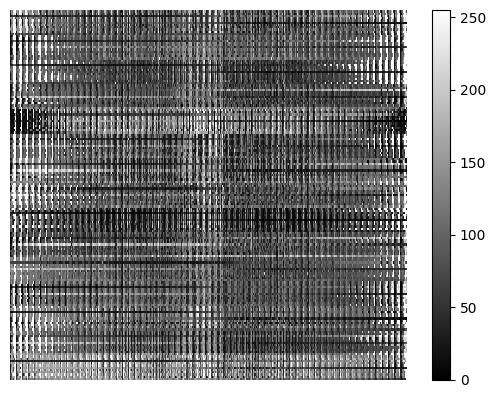

In [3]:
# Visualize the raw data
plt.figure()
plt.pcolor(fea, cmap='gray')
plt.colorbar()
plt.axis('off')

plt.pause(1)  # Pause for 1 second

In [5]:
# Representation of faces
Y = np.zeros((faceH*ShowLine, faceW*numPerLine))  # Initialize an array to hold the reshaped images
for i in range(ShowLine):
    for j in range(numPerLine):
        # Reshape each 1D image data into 2D (64x64) and place it in the correct position within array Y
        Y[i*faceH:(i+1)*faceH, j*faceW:(j+1)*faceW] = np.reshape(fea[i*numPerLine+j, :], (faceH, faceW))

In the transposed version of `fea` (after executing `fea = np.transpose(fea)`), each row corresponds to an image, and each column within that row corresponds to a pixel value of the image.

So, in this transposed `fea`:

- `fea[0]` represents the first image.
- `fea[0][0]` represents the first pixel value of the first image.
- `fea[0][4095]` represents the 4096th pixel value of the first image (assuming zero-based indexing).

The reshaping operation is employed to convert the 1D array representing an image (a row in `fea`) into a 2D array with dimensions `64x64`, aligning with the original dimensions of the image.

The line of code `np.reshape(fea[i*numPerLine+j, :], (faceH, faceW))` orchestrates the reshaping. Here's the breakdown of this line:

- `i*numPerLine+j` computes the index of the image within `fea`.
- `fea[i*numPerLine+j, :]` extracts the row corresponding to the image.
- `np.reshape(fea[i*numPerLine+j, :], (faceH, faceW))` reshapes the 1D array into a 2D array of dimensions `64x64`.

So, in mathematical notation, the operation can be expressed as follows:

$ Y_{\text{sub}} = M$

where:

$ Y_{\text{sub}} = Y[i \cdot \text{faceH}:(i+1) \cdot \text{faceH}, j \cdot \text{faceW}:(j+1) \cdot \text{faceW}]$

$ M = \text{Reshape}(\mathbf{v})$

and $ \mathbf{v} = \text{fea}[i \cdot \text{numPerLine} + j, :] $.

This expression encapsulates the process of selecting a submatrix within $ Y $, reshaping a vector into a matrix $ M $, and then assigning this matrix $ M $ to the selected submatrix $ Y_{\text{sub}} $ within $ Y $.


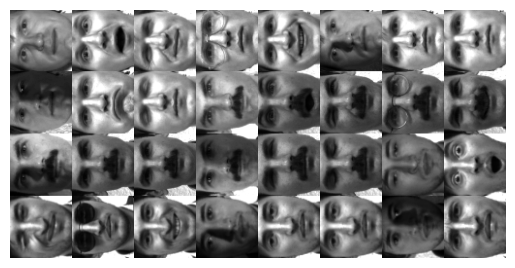

In [6]:
plt.figure()
plt.imshow(Y, cmap='gray')
plt.axis('off')

plt.pause(1)  # Pause for 1 second

After the nested loops, reshaping each one from a 1D array to a 2D 64x64 array, and placing them into the correct position in `Y` for display. Then, we can create a new figure, use `imshow` to display `Y` as an image, set the colormap to grayscale, remove the axis labels.


In [7]:
# Perform SVD
U, S, Vt = np.linalg.svd(fea, full_matrices=False)  # Compute the economy-size SVD of matrix 'fea'

In this segment, we perform Singular Value Decomposition (SVD) on the matrix `fea` using the `np.linalg.svd` function from NumPy's linear algebra module. SVD is a factorization of a real or complex matrix, with many applications in signal processing, statistics, natural language processing, and several other domains.

The expression $ A = USV^T $ is the fundamental equation of SVD, where:
- $ A $ is the original matrix (`fea` in this case),
- $ U $ is an orthogonal matrix,
- $ S $ is a diagonal matrix, and
- $ V^T $ is the transpose of an orthogonal matrix $ V $.

Here, `full_matrices=False` is passed to `np.linalg.svd` to compute the economy-size decomposition, which produces the smallest possible matrices $ U, S, $ and $ V^T $.

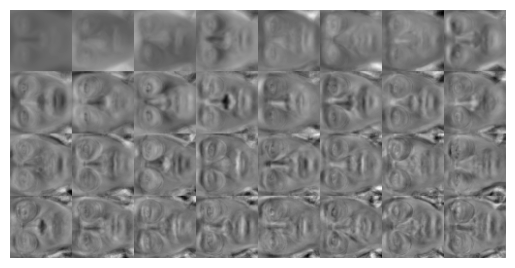

In [8]:
Z = np.zeros((faceH*ShowLine, faceW*numPerLine))
for i in range(ShowLine):
    for j in range(numPerLine):
        Z[i*faceH:(i+1)*faceH, j*faceW:(j+1)*faceW] = np.reshape(Vt[i*numPerLine+j, :], (faceH, faceW))

plt.figure()
plt.imshow(Z, cmap='gray')
plt.axis('off')

plt.show()

Similar to previous visual, but for the eigenvectors in `Vt` instead of the images in `fea`. We have reshaped each eigenvector into a 64x64 image and placed them into `Z` for display. Then, we create a new figure, display `Z` as an image, set the colormap to grayscale, and remove the axis labels.

**Singular Vector Visualization**:
   - Finally, the code visualizes the singular vectors (rows of \( V^T \)) as images, displayed in a grid layout similar to the original images.
   - This visualization helps to see the significant patterns (or features) captured by the singular vectors, which represent the data's underlying structure.

In essence, this code provides a comprehensive exploration of the face image dataset. The visual representation of singular vectors further illuminates the inherent patterns within the data, which could be pivotal for various applications like face recognition, dimensionality reduction, or other machine learning tasks related to image analysis.